Zhang, Ruohan, Zhuode Liu, Luxin Zhang, Jake A. Whritner, Karl S. Muller, Mary M. Hayhoe, and Dana H. Ballard. "AGIL: Learning attention from human for visuomotor tasks." In Proceedings of the European Conference on Computer Vision (ECCV), pp. 663-679. 2018.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
dataFolder = '/Users/sbk/Documents/Datasets/Eyetracking/Atari/space_invaders/highscore/'
sub_folders = [name for name in os.listdir(dataFolder) if os.path.isdir(os.path.join(dataFolder, name))]

print(sub_folders)
fileName = dataFolder + sub_folders[0] + '.txt'
my_cols = ['frame_id','episode_id','score','duration','unclipped_reward','action','gaze_positions']
if os.path.isfile(fileName):
    extract = pd.read_fwf(dataFolder + sub_folders[0] + '.txt', header = 0, names = ['Col'])

emptyDict = {my_cols[0]: 'a', my_cols[1]: 1, my_cols[2]: 1, my_cols[3]: 1, my_cols[4]: 1, 
             my_cols[5]: 1, my_cols[6]: [[1,1,1,1,1]]}

['511_RZ_3988011_Jul-24-12-07-48', '541_RZ_4427259_Jul-29-14-08-29', '554_RZ_4520643_Jul-30-16-08-32', '587_RZ_4775423_Aug-02-14-51-06', '514_RZ_3993948_Jul-24-13-47-04', '596_RZ_5117737_Aug-06-13-56-16', '512_RZ_3991738_Jul-24-13-12-15']


In [3]:
def getVal(array, idx):
    try:
        value = int(array[idx])
    except:
        value = None;
    return value
        

In [10]:
df = pd.DataFrame(emptyDict)

for ix in range(len(extract)):
    dummy = pd.DataFrame(emptyDict);
    bData = extract.Col[ix];
    string = bData.split(',');
    info = string[0:6]
    coord = np.asarray(string[7:], dtype=np.float64).tolist();
    try:
        action = int(info[5])
    except ValueError:
        action = 0
    dummy[my_cols[0]] = info[0];
    dummy[my_cols[1]] = getVal(info, 1);
    dummy[my_cols[2]] = getVal(info, 2);
    dummy[my_cols[3]] = getVal(info, 3);
    dummy[my_cols[4]] = getVal(info, 4);
    dummy[my_cols[5]] = getVal(info, 5);
    dummy[my_cols[6]] = [coord];
    
    df = pd.concat([df, dummy], ignore_index = True)

df.drop(index = 0, inplace = True)
df.head()

,frame_id,episode_id,score,duration,unclipped_reward,action,gaze_positions
1,RZ_3988011_1,0,5130,916,0,0,"[104.7, 79.0, 104.62, 79.0, 104.62, 79.0, 104...."
2,RZ_3988011_2,0,5130,50,0,0,"[144.43, 44.4, 144.57, 44.42, 144.35, 44.45, 1..."
3,RZ_3988011_3,0,5130,50,0,0,"[144.32, 44.41, 144.2, 44.48, 144.1, 44.49, 14..."
4,RZ_3988011_4,0,5130,50,0,0,"[143.57, 44.49, 143.7, 44.5, 143.6, 44.51, 143..."
5,RZ_3988011_5,0,5130,1252,0,0,"[143.8, 44.75, 143.75, 44.76, 143.78, 44.79, 1..."


In [11]:
bemptyGaze = df['gaze_positions'].apply(lambda x: len(x) == 0)
print(f'The dataframe contains {sum(bemptyGaze)} rows with no gaze information');


The dataframe contains 207 rows with no gaze information


In [12]:
df = df[(bemptyGaze == False)]

In [13]:
#checking for nulls in the dataframe:
bNulls = df.isnull();
bNulls.sum()

frame_id            0
episode_id          0
score               0
duration            0
unclipped_reward    0
action              0
gaze_positions      0
dtype: int64

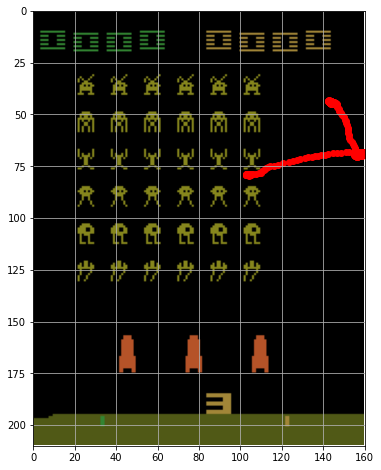

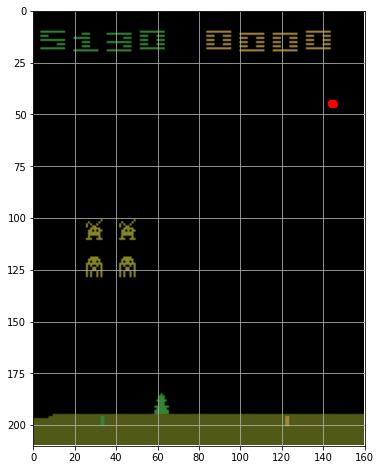

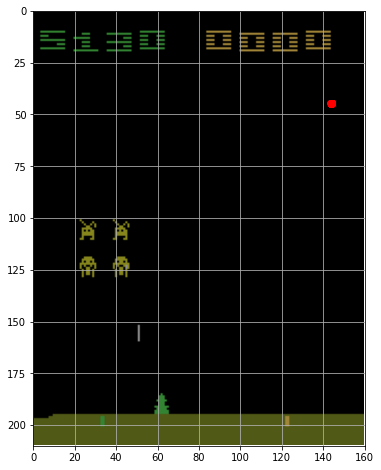

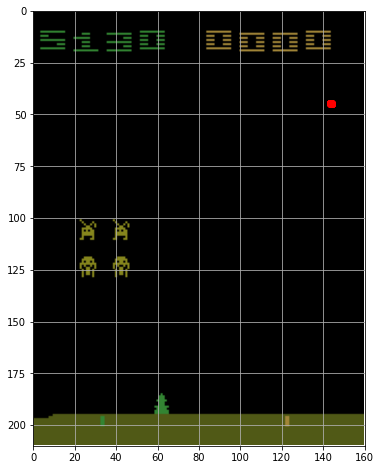

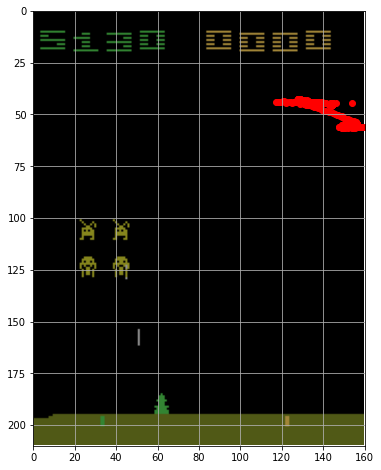

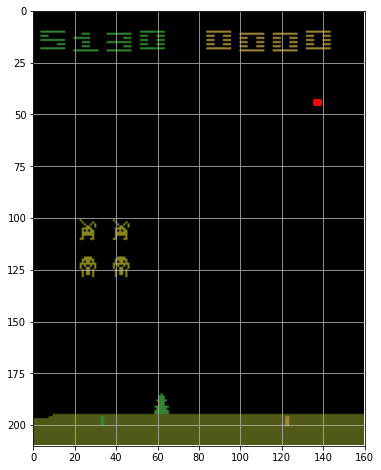

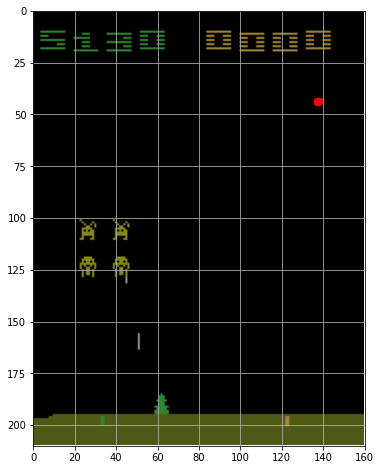

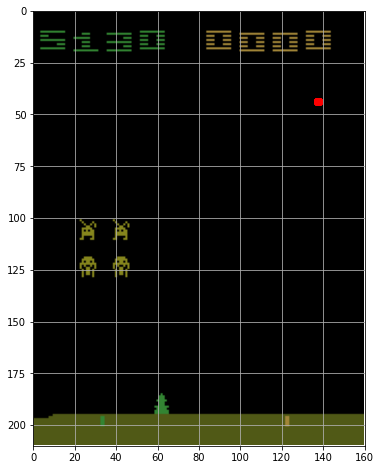

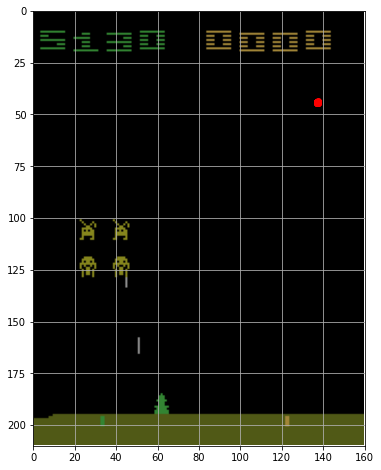

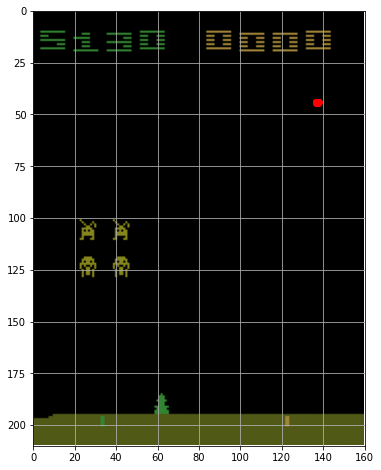

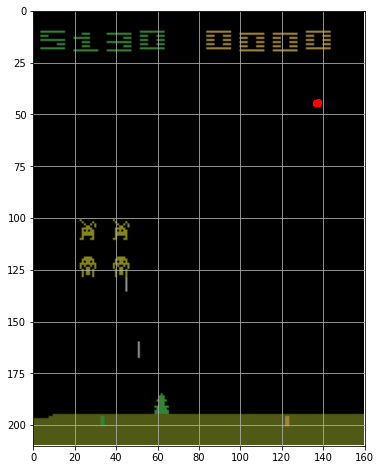

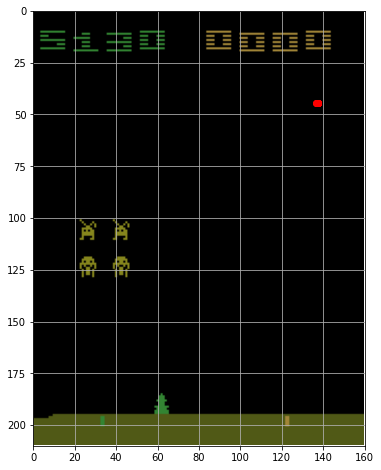

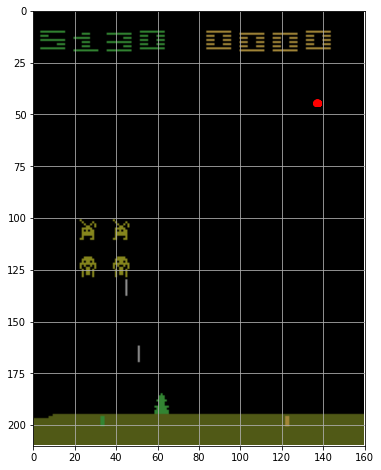

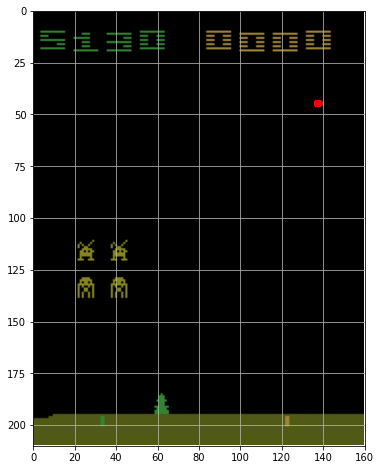

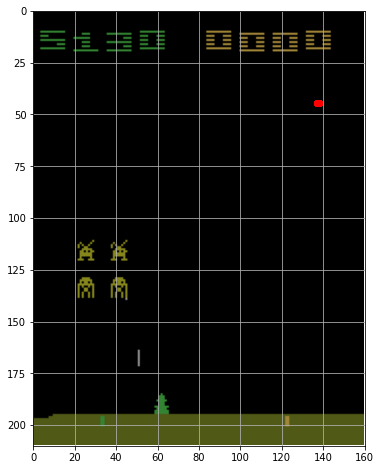

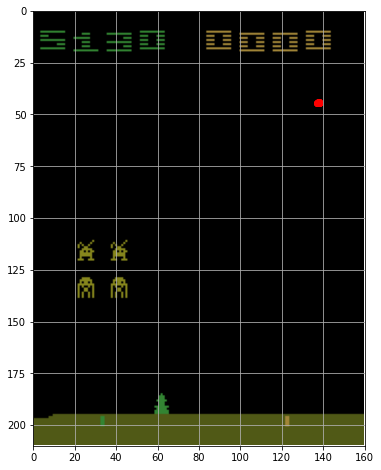

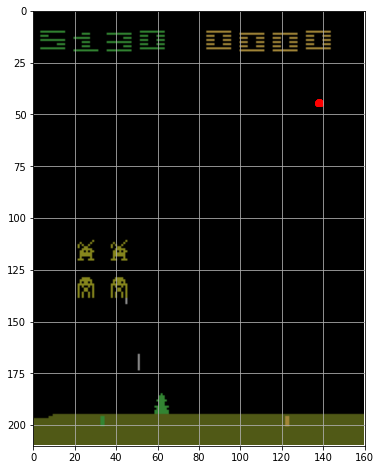

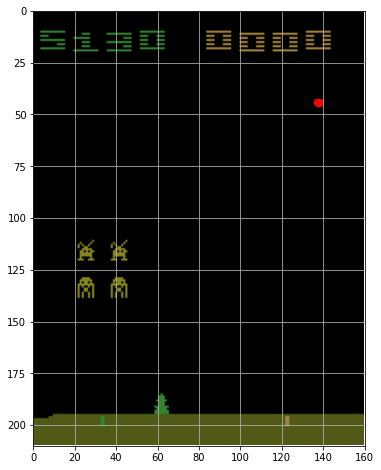

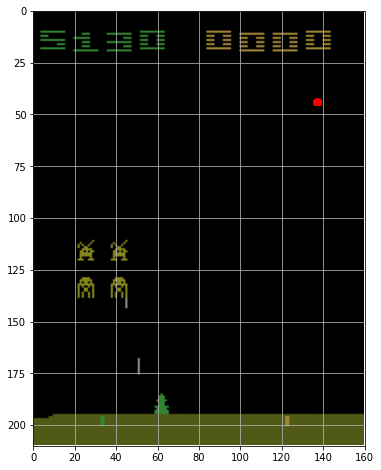

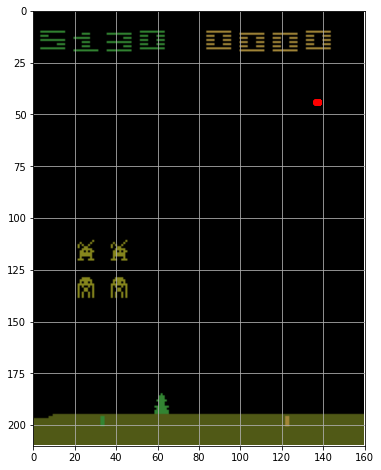

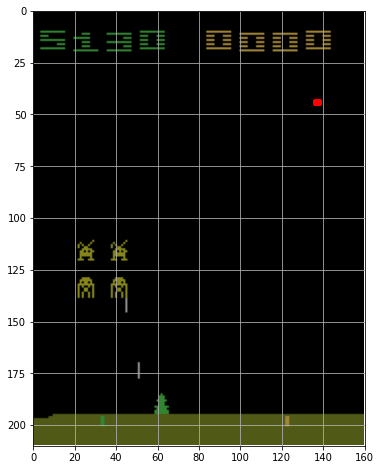

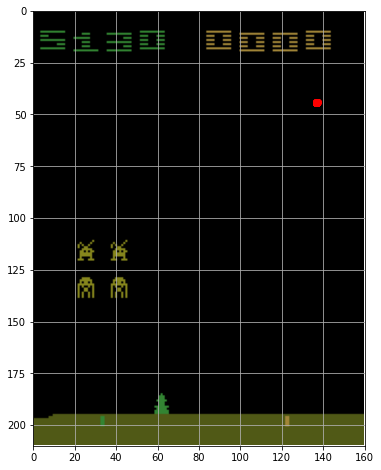

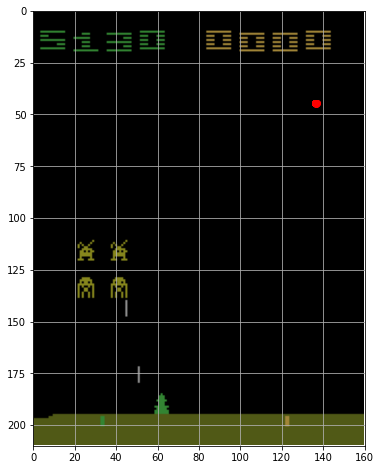

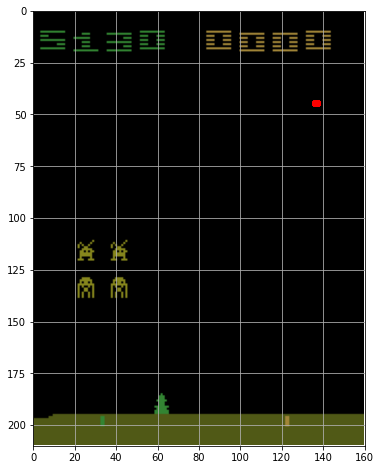

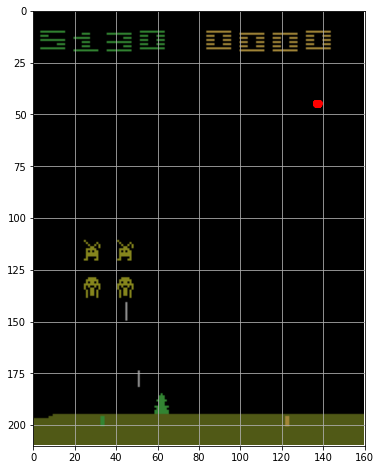

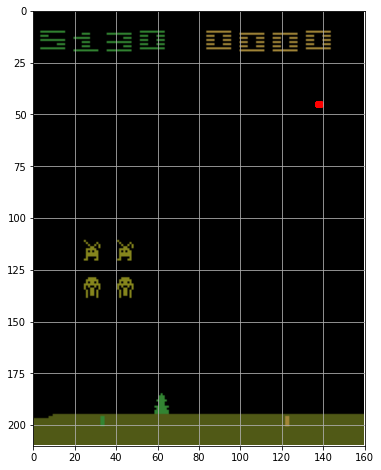

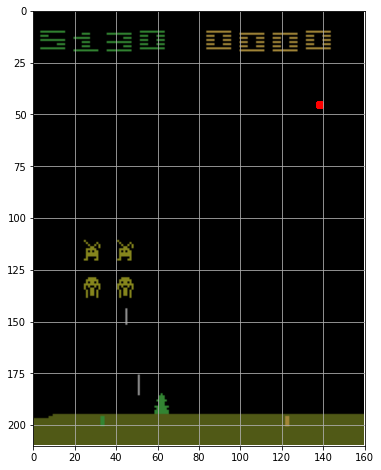

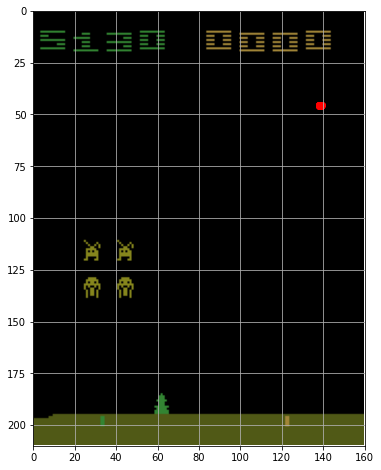

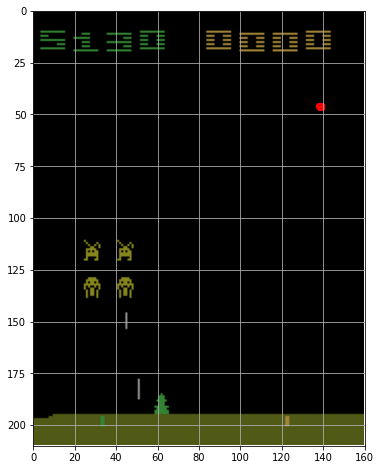

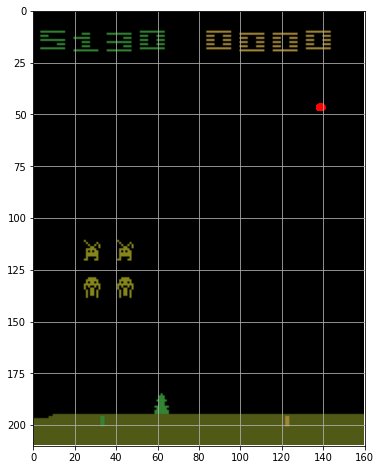

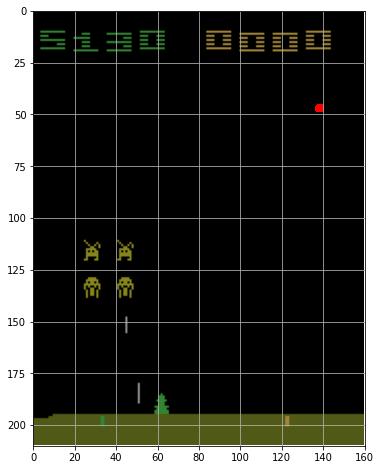

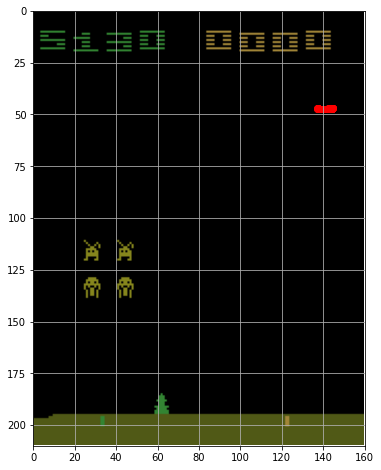

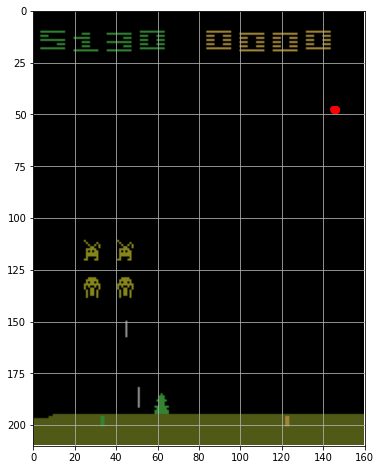

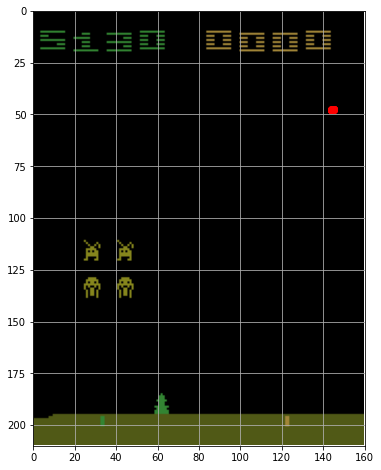

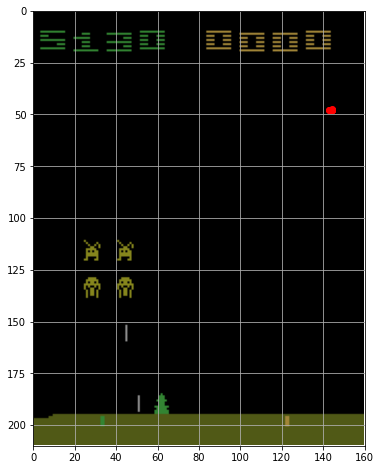

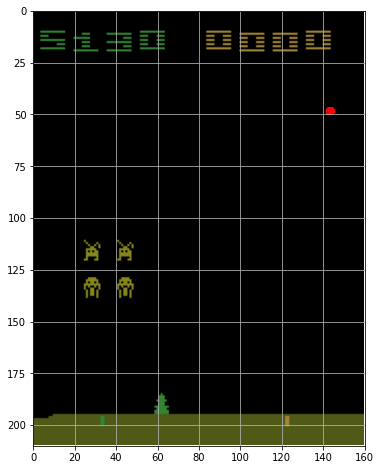

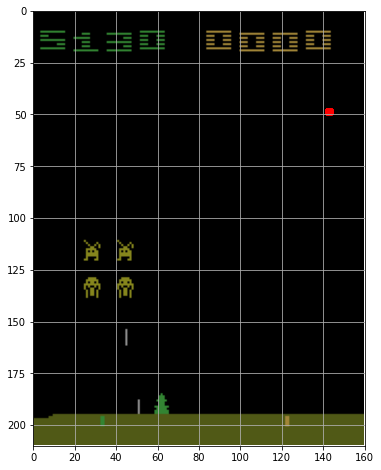

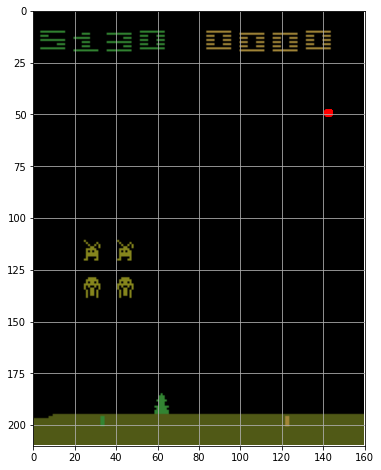

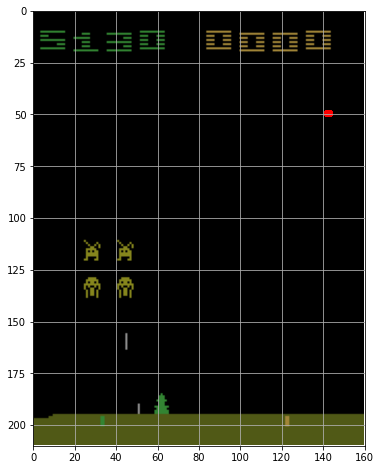

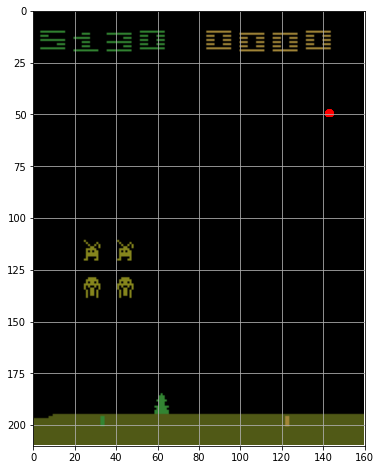

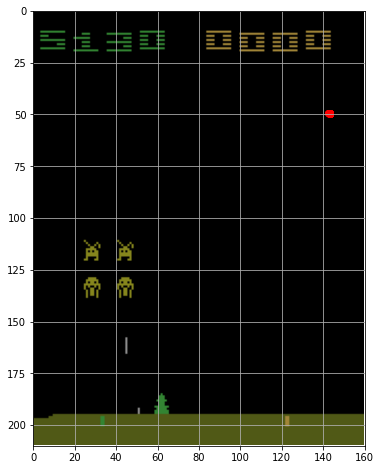

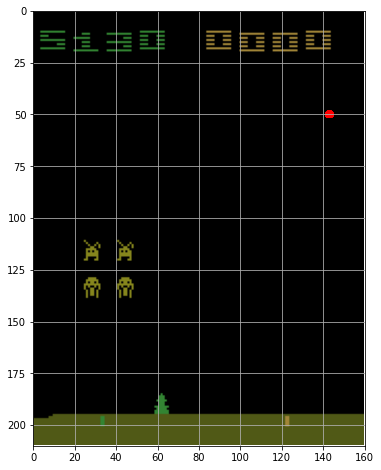

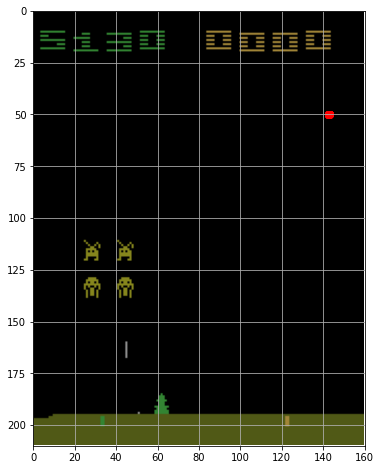

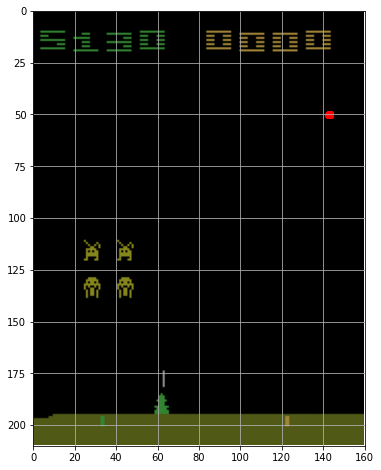

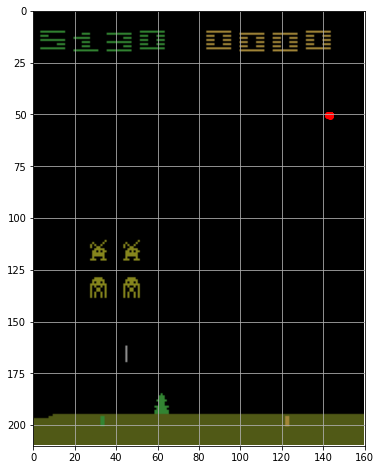

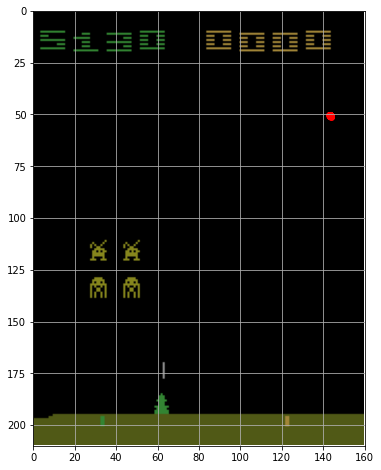

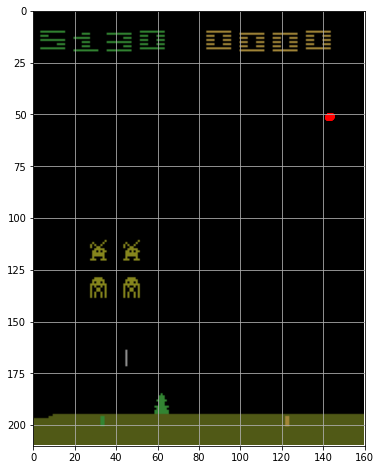

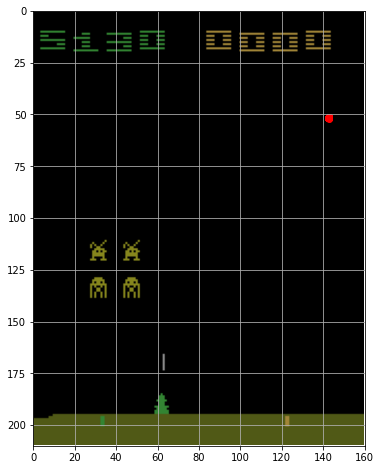

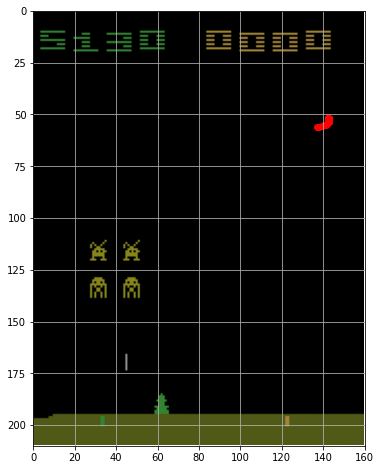

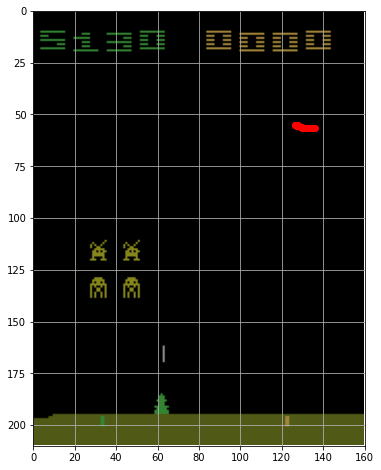

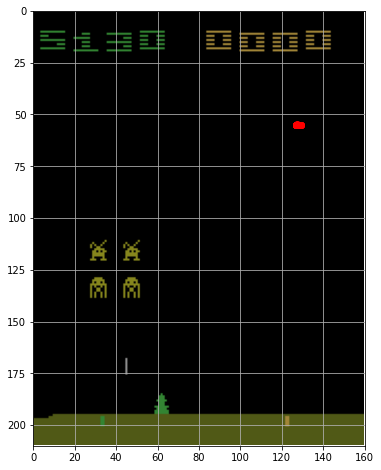

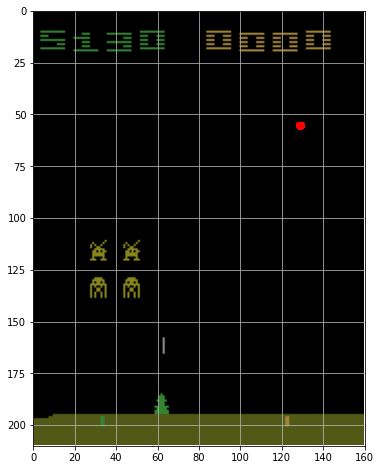

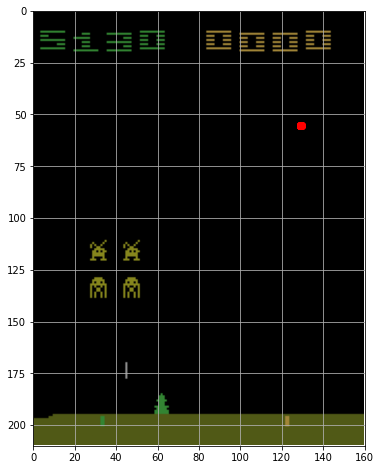

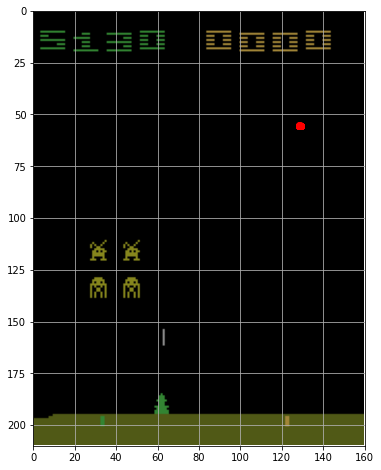

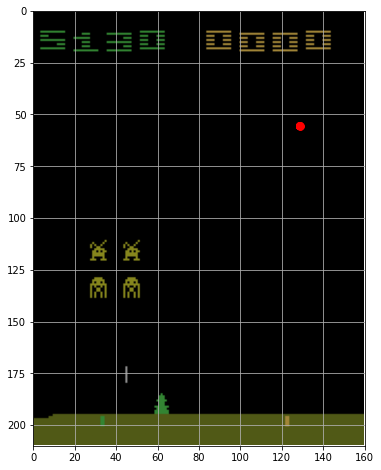

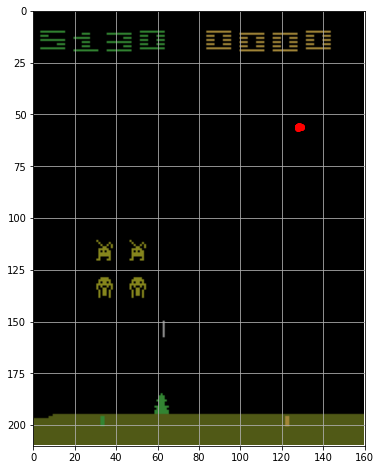

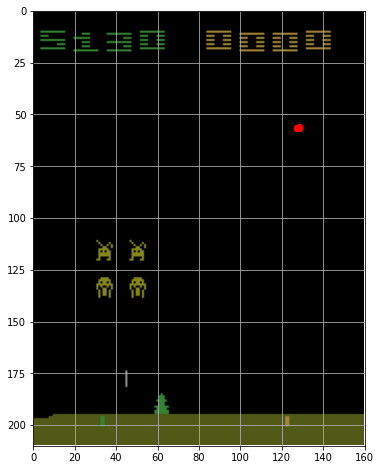

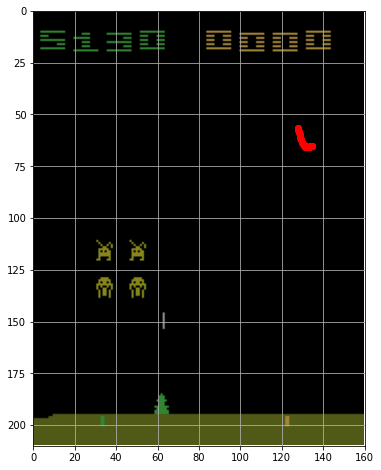

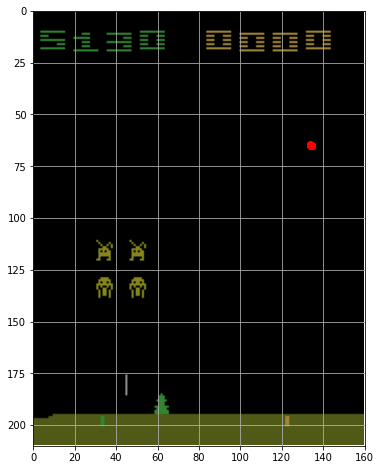

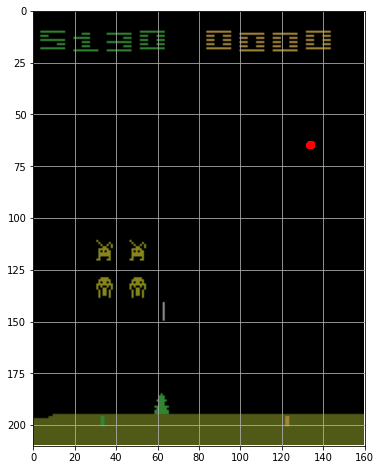

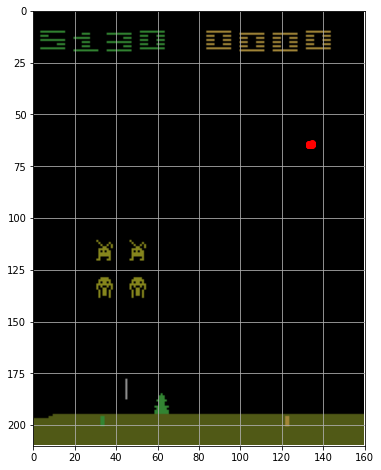

KeyboardInterrupt: 

<Figure size 576x576 with 0 Axes>

In [32]:
for frame in range(len(df)): 

    picFile = dataFolder + sub_folders[0] + '/' + df.frame_id.iloc[frame] + '.png'
    # load the image
    img = plt.imread(picFile)

    # create a plot
    fig, ax = plt.subplots(1,1,figsize = (8,8))
    ax.imshow(img)

    # plot gaze coordinates
    coord = df.gaze_positions.iloc[frame]
    x = coord[0:-1:2]
    y = coord[1:-1:2]

    ax.set_ylim(np.size(img,0), 0);
    ax.set_xlim(0, np.size(img,1));
    ax.scatter(x, y, marker='o', color='red')
    ax.grid();
    # show the plot
    plt.show()
